
--- Dataset Overview ---
(2490480, 41)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2490480 entries, 0 to 2490479
Data columns (total 41 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Name              object 
 1   Sex               object 
 2   Event             object 
 3   Equipment         object 
 4   Age               float64
 5   AgeClass          object 
 6   BirthYearClass    object 
 7   Division          object 
 8   BodyweightKg      float64
 9   WeightClassKg     object 
 10  Squat1Kg          float64
 11  Squat2Kg          float64
 12  Squat3Kg          float64
 13  Squat4Kg          float64
 14  Best3SquatKg      float64
 15  Bench1Kg          float64
 16  Bench2Kg          float64
 17  Bench3Kg          float64
 18  Bench4Kg          float64
 19  Best3BenchKg      float64
 20  Deadlift1Kg       float64
 21  Deadlift2Kg       float64
 22  Deadlift3Kg       float64
 23  Deadlift4Kg       float64
 24  Best3DeadliftKg   float64
 25  Total

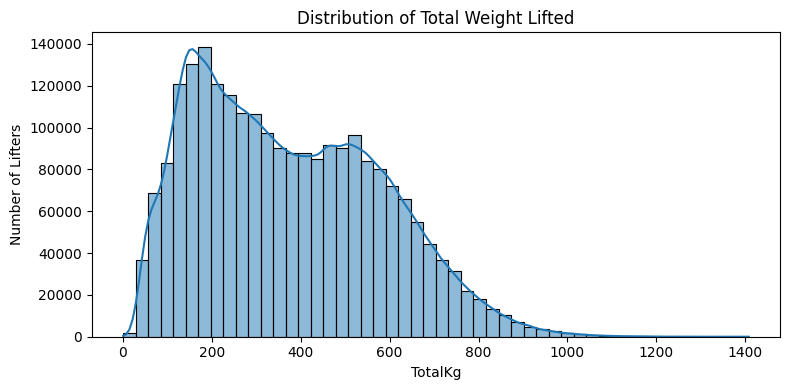

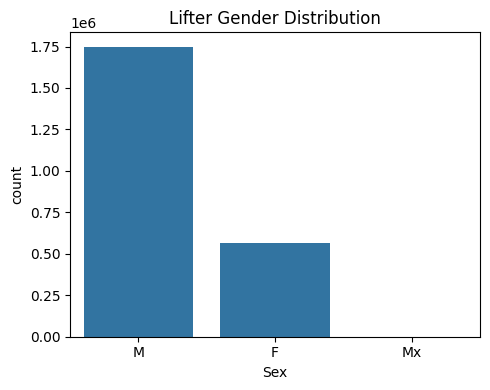

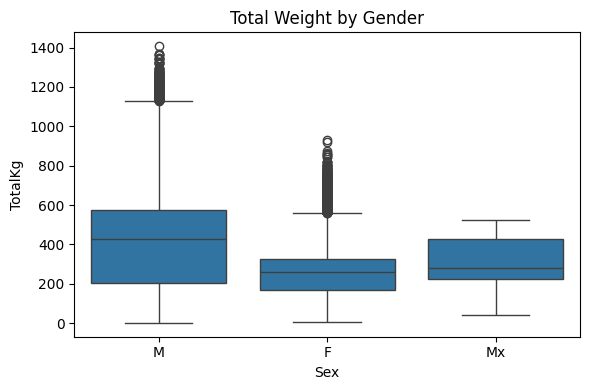

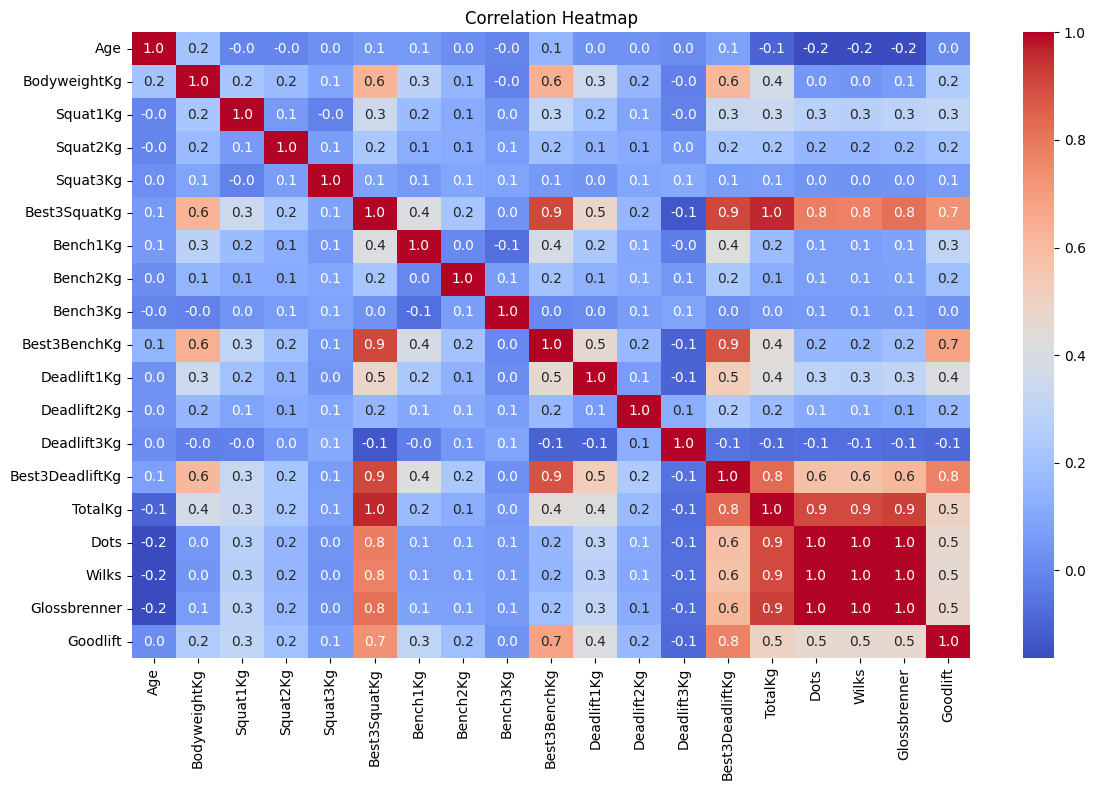

In [2]:
# %% [markdown]
# # OpenPowerlifting Data Cleaning and EDA
# Deliverable 1 – MSCS 634 Project

# %% Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# %% Load the dataset
df = pd.read_csv('openpowerlifting-2021-06-26-027dc895.csv', low_memory=False)

# %% Initial Inspection
print("\n--- Dataset Overview ---")
print(df.shape)
print(df.info())
print(df.head())

# %% Check and Report Missing Values
print("\n--- Missing Values (Top 20) ---")
missing = df.isnull().sum().sort_values(ascending=False)
print(missing.head(20))

# %% Drop Columns with Excessive Nulls
columns_to_drop = ['Squat4Kg', 'Bench4Kg', 'Deadlift4Kg', 'MeetState', 'Tested', 'MeetCountry']
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# %% Clean Rows
df.dropna(subset=['TotalKg'], inplace=True)
df['BodyweightKg'] = df['BodyweightKg'].fillna(df['BodyweightKg'].mean())
df.drop_duplicates(inplace=True)

# %% Post-cleaning Summary
print("\n--- Post-cleaning Missing Values ---")
missing_cleaned = df.isnull().sum().sort_values(ascending=False)
print(missing_cleaned[missing_cleaned > 0])

print("\n--- Cleaned Dataset Summary ---")
print(df.describe())

# %% EDA: Distribution of Total Weight Lifted
plt.figure(figsize=(8, 4))
sns.histplot(df['TotalKg'], bins=50, kde=True)
plt.title('Distribution of Total Weight Lifted')
plt.xlabel('TotalKg')
plt.ylabel('Number of Lifters')
plt.tight_layout()
plt.show()

# %% EDA: Gender Distribution
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='Sex')
plt.title('Lifter Gender Distribution')
plt.tight_layout()
plt.show()

# %% EDA: Boxplot - Total Weight by Gender
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Sex', y='TotalKg')
plt.title('Total Weight by Gender')
plt.tight_layout()
plt.show()

# %% EDA: Correlation Heatmap
plt.figure(figsize=(12, 8))
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

